### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

We have to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### 1) Import Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from os.path import exists

#no limit of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all datasets
churn_original_test_data = pd.read_csv("test (1).csv")
churn_original_train_data = pd.read_csv("train (1).csv")


In [3]:
churn_original_test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [4]:
# The head of our train dataset
churn_original_train_data.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
churn_original_train_data.describe([.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,62998.2000,66498.1000,69298.02000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.0000,109.0000,109.00000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,619.9938,832.0227,1400.27664,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,615.6614,823.2367,1414.89138,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,614.9946,828.4647,1445.05480,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,345.0800,617.1850,1447.09800,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,347.9080,628.4375,1478.54090,8157.780


In [6]:
churn_original_train_data.shape

(69999, 172)

In [7]:
churn_original_test_data.shape

(30000, 171)

In [8]:
churn_original_train_data.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [9]:
def check_train_nullpercentage(df):
    percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
    return percent_null

In [10]:
check_train_nullpercentage(churn_original_train_data)

15.241795813029887

In [11]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column are as follows:')
df_missing_columns = (round(((churn_original_train_data.isnull().sum()/len(churn_original_train_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


Percentage of Missing Values in each column are as follows:


,null
arpu_3g_6,74.90
count_rech_2g_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90


In [12]:
# List the columns having more than 50% missing values
col_list_missing_50 = list(df_missing_columns.index[df_missing_columns['null'] > 50])
col_list_missing_50

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [13]:
# Delete the columns having more than 50% missing values
churn_train_data = churn_original_train_data.drop(col_list_missing_50, axis=1)
check_train_nullpercentage(churn_train_data)

2.752715380843469

In [14]:
churn_train_data = churn_train_data.dropna()
check_train_nullpercentage(churn_train_data)

0.0

In [15]:
churn_train_data.shape

(61895, 142)

#### Deleting the date columns as these are not required in our analysis


In [16]:
# List the date columns
date_cols = [k for k in churn_train_data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [17]:
# Dropping date columns
churn_train_data = churn_train_data.drop(date_cols, axis=1)
churn_train_data.shape

(61895, 136)

### lets check for column which having same value for entire data. 

In [18]:
samevaluecols = []
for col in churn_train_data.columns:
    if churn_train_data[col].nunique() ==1:
        samevaluecols+=[col]
    print('{} : {}'.format(col,churn_train_data[col].nunique()))

id : 61895
circle_id : 1
loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
arpu_6 : 56883
arpu_7 : 57024
arpu_8 : 56641
onnet_mou_6 : 19241
onnet_mou_7 : 19502
onnet_mou_8 : 19094
offnet_mou_6 : 25312
offnet_mou_7 : 25458
offnet_mou_8 : 25294
roam_ic_mou_6 : 5068
roam_ic_mou_7 : 4062
roam_ic_mou_8 : 4121
roam_og_mou_6 : 6168
roam_og_mou_7 : 4992
roam_og_mou_8 : 5017
loc_og_t2t_mou_6 : 11190
loc_og_t2t_mou_7 : 11190
loc_og_t2t_mou_8 : 11137
loc_og_t2m_mou_6 : 17378
loc_og_t2m_mou_7 : 17362
loc_og_t2m_mou_8 : 17401
loc_og_t2f_mou_6 : 3279
loc_og_t2f_mou_7 : 3290
loc_og_t2f_mou_8 : 3247
loc_og_t2c_mou_6 : 1894
loc_og_t2c_mou_7 : 2049
loc_og_t2c_mou_8 : 2152
loc_og_mou_6 : 21684
loc_og_mou_7 : 21655
loc_og_mou_8 : 21622
std_og_t2t_mou_6 : 13733
std_og_t2t_mou_7 : 14102
std_og_t2t_mou_8 : 13812
std_og_t2m_mou_6 : 15227
std_og_t2m_mou_7 : 15573
std_og_t2m_mou_8 : 15237
std_og_t2f_mou_6 : 1985
std_og_t2f_mou_7 : 1910
std_og_t2f_mou_8 : 1873
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std

In [19]:
samevaluecols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

#### Dropping these columns as they are having single value for the entire data. Hence there will be no impact of these column on the data analysis.

In [20]:
# Drop circle_id column
churn_train_data = churn_train_data.drop(churn_train_data[samevaluecols], axis=1)
churn_train_data.shape

(61895, 126)

In [21]:
# Check if there are any duplicate value still exists in data
churn_train_data.duplicated().sum()

0

In [22]:
churn_train_data.describe([.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
id,61895.0,35034.549350,20192.992366,0.000,17562.5000,35083.000,52506.500,62999.6000,66496.6000,69296.06000,69998.000
arpu_6,61895.0,293.583717,333.786791,-810.661,100.5330,207.620,383.403,633.8954,849.5329,1410.99630,27731.088
arpu_7,61895.0,296.110534,351.044889,-622.509,100.9265,208.524,385.143,639.6292,850.9724,1448.23516,35145.834
arpu_8,61895.0,297.141384,357.781341,-345.129,100.9715,209.136,389.707,638.1240,850.3729,1468.07560,33543.624
onnet_mou_6,61895.0,134.059224,300.571966,0.000,7.7900,34.730,120.480,347.8400,622.8270,1450.66480,7376.710
onnet_mou_7,61895.0,138.660389,316.534428,0.000,7.5900,34.490,121.560,360.6280,649.6190,1504.01700,8157.780
onnet_mou_8,61895.0,135.000000,314.679513,0.000,7.0400,33.130,117.410,349.0360,628.9600,1485.36180,10752.560
offnet_mou_6,61895.0,200.505383,316.567112,0.000,35.9000,97.680,236.050,485.2400,739.0300,1547.11700,8362.360
offnet_mou_7,61895.0,204.031269,327.195711,0.000,35.3350,97.130,236.900,496.9280,766.0640,1562.90080,7043.980
offnet_mou_8,61895.0,199.283881,323.126167,0.000,33.6200,94.780,233.900,490.8520,744.1690,1522.48680,14007.340


### 2) Exploratory Data Analysis

In [23]:
## Converting churn column to int in order to do aggfunc in the pivot table
#churn_train_data['churn_probability'] = churn_train_data['churn_probability'].astype('int64')

In [24]:
def category_counts(col, df):
    plt.figure(figsize=(12,8));
    sns.countplot(x=df[col],palette='Dark2');
    plt.xlabel(col);
    plt.ylabel('Counts');
    plt.title(f"{col} Value Counts");
    plt.show()

##### Categorical Columns

lets find out the columns whose unique value count is < 20

In [25]:
colls = []
for col in churn_train_data.columns:
    if churn_train_data[col].nunique() <20:
        colls+=[col]
        print('{} : {}'.format(col,churn_train_data[col].nunique()))

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12
churn_probability : 2


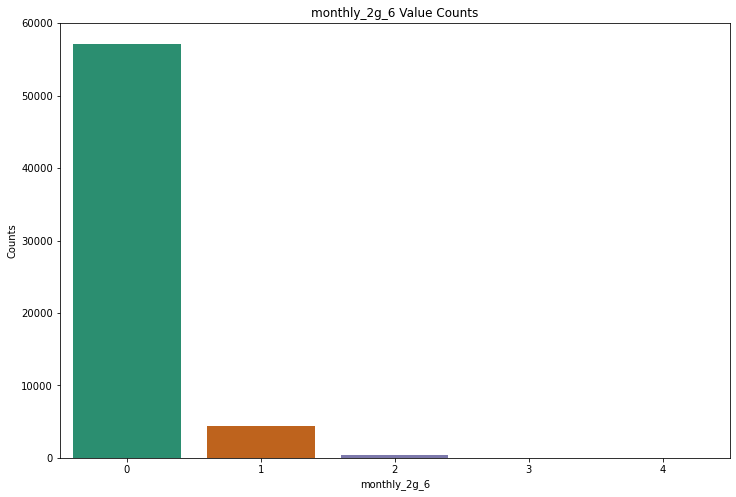

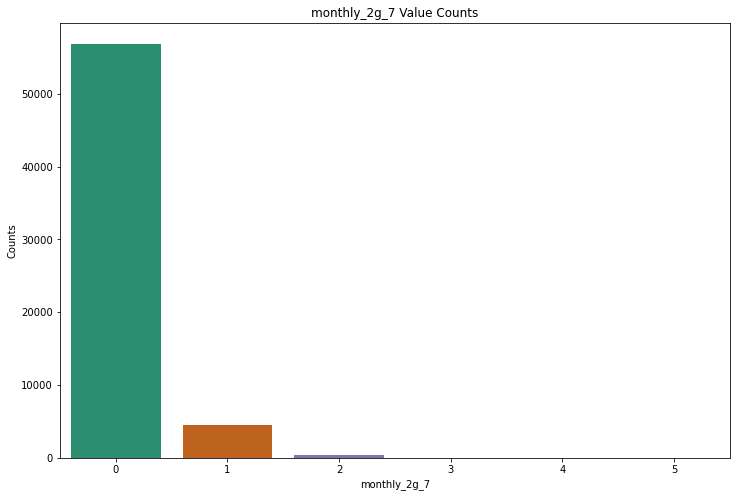

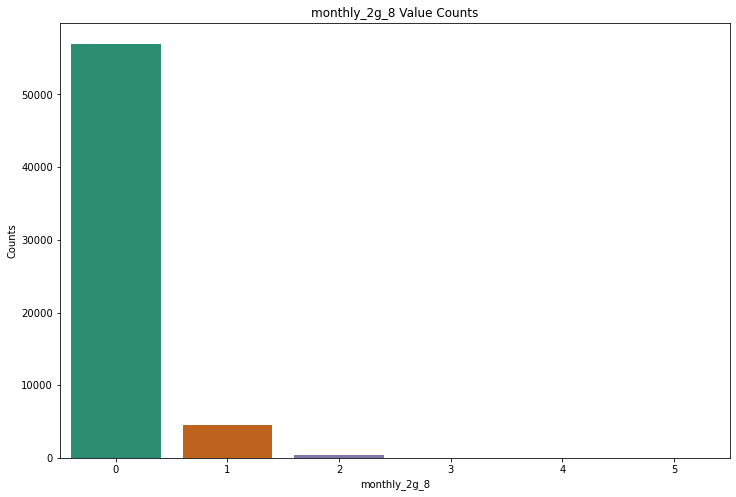

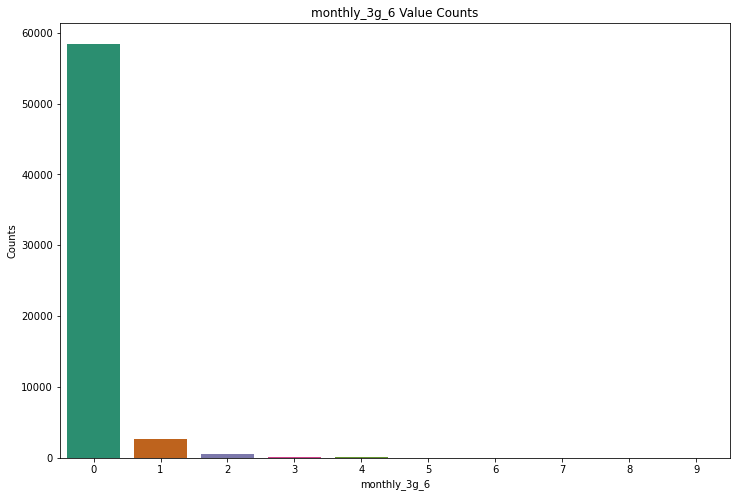

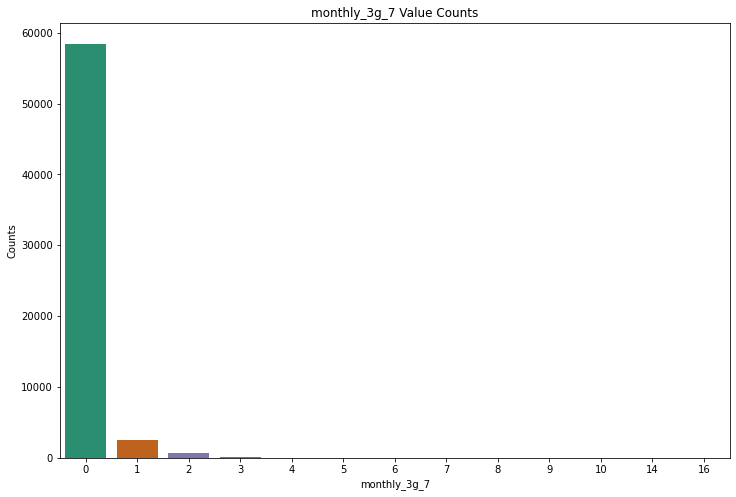

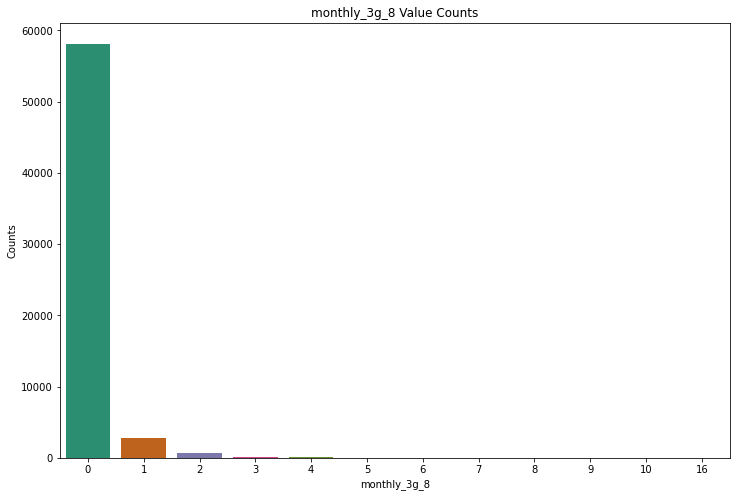

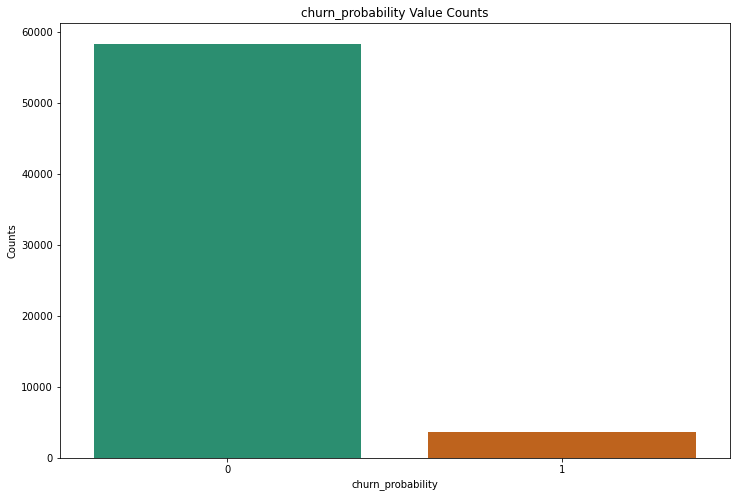

In [26]:
for col in colls:
    category_counts(col,churn_train_data)

In [27]:
# Checking churn percentage
round(100*(churn_train_data['churn_probability'].mean()),2)

5.84

#### Derive new features

In [28]:
# List the columns of total mou, rech_num and rech_amt
[total for total in churn_train_data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

##### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [29]:
derived_columns=[]

# Total mou at good phase incoming and outgoing
churn_train_data['total_mou_good'] = (churn_train_data['total_og_mou_6'] + churn_train_data['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
churn_train_data['avg_mou_action'] = (churn_train_data['total_og_mou_7'] + churn_train_data['total_og_mou_8'] + churn_train_data['total_ic_mou_7'] + churn_train_data['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
churn_train_data['diff_mou'] = churn_train_data['avg_mou_action'] - churn_train_data['total_mou_good']

# Checking whether the mou has decreased in action phase
churn_train_data['decrease_mou_action'] = np.where((churn_train_data['diff_mou'] < 0), 1, 0)



In [30]:

derived_columns.append('total_mou_good')
derived_columns.append('avg_mou_action')
derived_columns.append('diff_mou')
derived_columns.append('decrease_mou_action')


#####  Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [31]:
# Avg rech number at action phase
churn_train_data['avg_rech_num_action'] = (churn_train_data['total_rech_num_7'] + churn_train_data['total_rech_num_8'])/2

# Difference total_rech_num_6 and avg_rech_action
churn_train_data['diff_rech_num'] = churn_train_data['avg_rech_num_action'] - churn_train_data['total_rech_num_6']

# Checking if rech_num has decreased in action phase
churn_train_data['decrease_rech_num_action'] = np.where((churn_train_data['diff_rech_num'] < 0), 1, 0)

In [32]:
derived_columns.append('avg_rech_num_action')
derived_columns.append('decrease_rech_num_action')
derived_columns.append('diff_rech_num')


###### Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [33]:
# Avg rech_amt in action phase
churn_train_data['avg_rech_amt_action'] = (churn_train_data['total_rech_amt_7'] + churn_train_data['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
churn_train_data['diff_rech_amt'] = churn_train_data['avg_rech_amt_action'] - churn_train_data['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
churn_train_data['decrease_rech_amt_action'] = np.where((churn_train_data['diff_rech_amt'] < 0), 1, 0) 

In [34]:
derived_columns.append('avg_rech_amt_action')
derived_columns.append('diff_rech_amt')
derived_columns.append('decrease_rech_amt_action')


##### Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [35]:
# ARUP in action phase
churn_train_data['avg_arpu_action'] = (churn_train_data['arpu_7'] + churn_train_data['arpu_8'])/2

# Difference of good and action phase ARPU
churn_train_data['diff_arpu'] = churn_train_data['avg_arpu_action'] - churn_train_data['arpu_6']

# Checking whether the arpu has decreased on the action month
churn_train_data['decrease_arpu_action'] = np.where(churn_train_data['diff_arpu'] < 0, 1, 0)

In [36]:
derived_columns.append('avg_arpu_action')
derived_columns.append('diff_arpu')
derived_columns.append('decrease_arpu_action')


##### Deriving new column decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [37]:
# VBC in action phase
churn_train_data['avg_vbc_3g_action'] = (churn_train_data['jul_vbc_3g'] + churn_train_data['aug_vbc_3g'])/2

# Difference of good and action phase VBC
churn_train_data['diff_vbc'] = churn_train_data['avg_vbc_3g_action'] - churn_train_data['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
churn_train_data['decrease_vbc_action'] = np.where(churn_train_data['diff_vbc'] < 0 , 1, 0)

In [38]:
derived_columns.append('avg_vbc_3g_action')
derived_columns.append('diff_vbc')
derived_columns.append('decrease_vbc_action')


### Univariate Analysis

Churn rate on the basis whether the customer decreased her/his MOU in action month


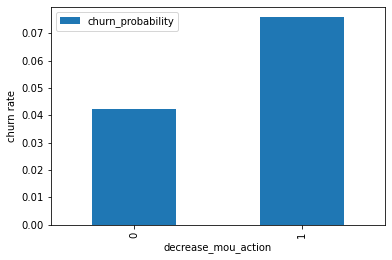

In [39]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- The churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.


##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

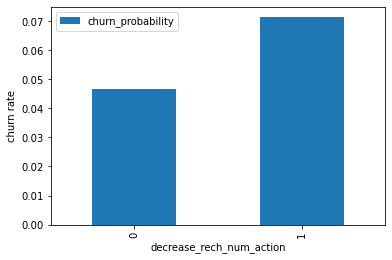

In [40]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.


##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

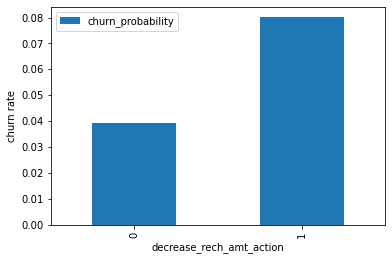

In [41]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

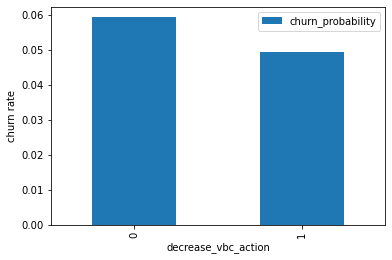

In [42]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [43]:
# Creating churn dataframe
data_churn = churn_train_data[churn_train_data['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = churn_train_data[churn_train_data['churn_probability'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

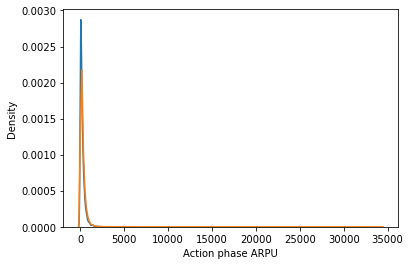

In [44]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'], label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'], label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

<b>Conclusion</b>

- Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

- ARPU for the not churned customers is mostly densed on the 0 to 1000.

###### Analysis of the minutes of usage MOU (churn and not churn) in the action phase


[Text(0.5, 0, 'Action phase MOU')]

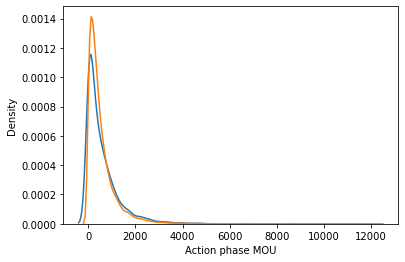

In [45]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2000 range. Higher the MOU, lesser the churn probability.



### Bivariate Analysis

<b>Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase</b>

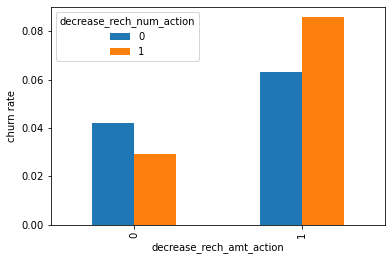

In [46]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

<b>Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase</b>

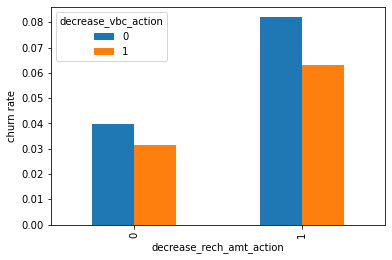

In [47]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

<b>Analysis of recharge amount and number of recharge in action month</b>

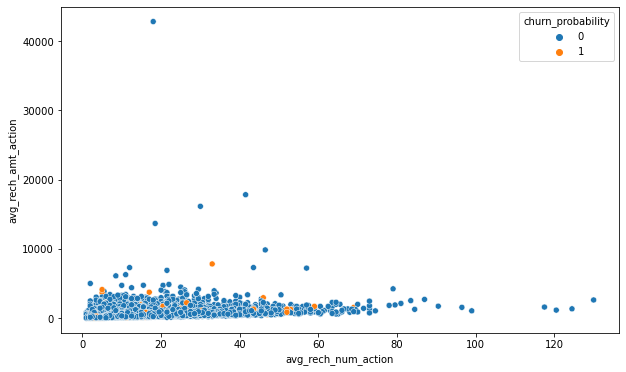

In [48]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn_probability', data=churn_train_data)

<b>Conclusion</b>

- We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis


In [49]:
print(derived_columns)

['total_mou_good', 'avg_mou_action', 'diff_mou', 'decrease_mou_action', 'avg_rech_num_action', 'decrease_rech_num_action', 'diff_rech_num', 'avg_rech_amt_action', 'diff_rech_amt', 'decrease_rech_amt_action', 'avg_arpu_action', 'diff_arpu', 'decrease_arpu_action', 'avg_vbc_3g_action', 'diff_vbc', 'decrease_vbc_action']


In [50]:
churn_train_data = churn_train_data.drop(derived_columns, axis=1)

### User Defined Functions

In [51]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(5,5))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 25,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [52]:
 def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(labels,predictions)
    print(matrix)
    print('\n')
    
    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

In [53]:
# Cheking the dataset Shape
churn_train_data.shape

(61895, 126)

## Train-Test Split

In [54]:
X = churn_train_data.drop(['churn_probability','id'],axis=1)
y=churn_train_data['churn_probability']

In [55]:
# Import library
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

## Feature Scaling

In [57]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [58]:
# Instantiate the Scaler
scaler = StandardScaler()

In [59]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
#len(cols_scale)

In [60]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [61]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
44873,-0.366467,-0.704611,-0.688557,-0.422846,-0.441626,-0.425644,-0.058685,-0.429430,-0.343880,-0.17456,-0.136919,-0.136865,-0.191457,-0.166097,-0.148712,-0.268385,-0.305273,-0.300241,0.522691,-0.205218,-0.047268,-0.274942,-0.278794,-0.279296,-0.196675,-0.170434,-0.212682,0.164145,-0.335167,-0.231915,-0.315363,-0.322110,-0.310164,-0.339722,-0.342567,-0.333319,-0.142392,-0.129783,-0.139595,-0.430971,-0.436402,-0.422821,-0.025128,-0.024951,-0.025611,-0.232517,-0.209674,-0.278100,-0.111301,-0.012876,-0.015295,-0.280217,-0.554422,-0.487827,0.733663,1.490629,0.506697,2.865541,0.737627,2.663498,-0.305952,-0.293446,-0.307485,2.260315,1.276490,2.024243,-0.110511,-0.067826,-0.195685,-0.205679,-0.161692,-0.144589,-0.12673,-0.134077,-0.125583,-0.232908,-0.177486,-0.222665,1.865943,0.987443,1.608270,0.210921,0.100209,-0.296318,-0.059086,-0.127961,-0.114966,-0.054843,-0.066446,-0.081935,-0.269009,-0.860592,-0.783784,-0.469342,-0.872302,-0.238144,0.031202,-0.930598,0.728708,0.503502,-0.674369,1.348093,-0.252986,-0.252120,-0.247871,-0.238431,-0.239839,-0.249780,-0.277176,-0.285865,-0.280515,-0.264929,-0.275204,-0.289605,-0.206771,-0.197346,-0.215926,-0.13222,-0.131564,-0.129667,2.061760,-0.263652,-0.255262,-0.236346
34863,-0.043844,-0.027085,0.363402,-0.447459,-0.440980,-0.427161,-0.616720,-0.601751,-0.611337,-0.17456,-0.136919,-0.126590,-0.191457,-0.166097,-0.148712,-0.316771,-0.309330,-0.303321,-0.581129,-0.608744,-0.599438,-0.274942,-0.278794,-0.279296,-0.196675,-0.170434,-0.212682,-0.578260,-0.591515,-0.580604,-0.315363,-0.318974,-0.310164,-0.324220,-0.316270,-0.332533,-0.142392,-0.129783,-0.139595,-0.420732,-0.417033,-0.422311,-0.025128,-0.024951,-0.025611,-0.232517,-0.209674,-0.278100,-0.111301,-0.012876,-0.015295,-0.675707,-0.669906,-0.666220,-0.354514,-0.341766,-0.353754,-0.554186,-0.409799,-0.597727,-0.305952,-0.221751,-0.311604,-0.614953,-0.501681,-0.645514,-0.127225,-0.130394,0.098603,-0.013308,-0.108134,12.873480,-0.12673,-0.079280,-0.031262,-0.093460,-0.155800,10.065280,-0.594583,-0.517296,3.190144,-0.361324,-0.239935,-0.296318,-0.134132,-0.127961,-0.128881,-0.064211,-0.073744,-0.071291,-0.410332,-0.581410,-0.645830,-0.230619,-0.152850,0.713906,1.278916,1.255654,1.166034,-0.706546,

In [62]:
#Scaling the test set
# We don't fit scaler on the test set. We only transform the test set.

# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
53465,0.194173,-0.869018,-0.391013,0.079252,-0.428893,-0.177319,0.816855,-0.582195,0.126231,-0.174560,-0.136919,-0.132794,-0.176623,0.149275,-0.140368,-0.290451,-0.310360,-0.267323,-0.234707,-0.608744,-0.482716,-0.274942,-0.278794,-0.279296,-0.012673,-0.170434,0.543539,-0.338653,-0.592157,-0.484838,0.289378,-0.322110,-0.038838,1.203873,-0.344081,0.471485,-0.142392,-0.129783,-0.139595,0.979161,-0.437400,0.277792,-0.025128,-0.024951,-0.025611,0.111202,-0.209674,-0.003868,-0.111301,-0.012876,-0.015295,0.631227,-0.687519,-0.015985,-0.306719,-0.343912,-0.339544,0.009675,-0.663593,-0.477661,-0.296090,-0.293446,-0.311604,-0.212301,-0.682504,-0.556822,-0.051801,-0.191037,-0.195685,-0.208950,-0.252911,-0.044637,-0.126730,-0.134077,-0.125583,-0.207225,-0.304708,-0.144832,-0.284962,-0.727575,-0.560143,-0.361324,-0.239935,-0.296318,-0.134132,-0.127961,-0.128881,-0.064211,-0.073744,-0.081935,0.296285,-0.581410,-0.231968,0.150819,-0.872302,-0.379464,0.031202,-0.930598,0.140000,-0.706546,-0.674369,0.644193,-0.252986,-0.252120,-0.247871,-0.238431,-0.239839,-0.249780,-0.277176,-0.285865,-0.280515,-0.264929,-0.275204,-0.289605,-0.206771,-0.197346,-0.215926,-0.132220,-0.131564,-0.129667,-0.706058,-0.263652,-0.255262,-0.236346
4106,0.077514,-0.003292,0.847772,-0.253530,-0.133891,0.138553,0.405821,0.312841,0.816117,0.529344,-0.136919,0.285931,-0.090505,-0.166097,0.123322,-0.229637,0.027351,-0.076295,-0.178480,-0.241780,0.532206,0.473669,0.114849,-0.065387,-0.196675,-0.170434,-0.212682,-0.225138,-0.128419,0.283165,-0.158472,-0.157557,0.177602,0.634889,0.550934,0.690365,-0.142392,-0.129783,-0.139595,0.314112,0.259103,0.562133,-0.025128,-0.024951,-0.025611,-0.232517,-0.209674,-0.188521,-0.111301,-0.012876,-0.015295,0.127443,0.141415,0.610944,-0.139581,0.517210,-0.173874,-0.497102,-0.053250,-0.170582,-0.305952,-0.293446,-0.311604,-0.457667,0.205878,-0.259070,-0.131404,-0.151378,0.189413,-0.041836,-0.009812,0.548488,-0.126730,-0.134077,-0.125583,-0.117437,-0.097237,0.494502,-0.463808,0.108683,-0.067501,0.840390,-0.239935,-0.296318,-0.134132,-0.127961,-0.128881,-0.025300,-0.034603,-0.081935,-0.551656,-0.721001,-0.921738,0.542636,0.530885,0.505645,3.897358,3.840983,3.672251,-0.706546,-0.674369,4.867591,-0.25

### Model with PCA

In [63]:
#Import PCA
from sklearn.decomposition import PCA

In [64]:
# Instantiate PCA
pca = PCA(random_state=42)

In [65]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [66]:
# Principal components
pca.components_

array([[ 1.89105020e-01,  1.97408276e-01,  1.85522618e-01, ...,
         4.64062272e-02,  4.58678453e-02,  4.44283838e-02],
       [-4.29776343e-02, -5.80983024e-02, -4.85159254e-02, ...,
         5.64721682e-02,  5.77656040e-02,  5.64110318e-02],
       [ 9.49999023e-02,  1.04427177e-01,  1.05819357e-01, ...,
         2.34678641e-01,  2.43727127e-01,  2.33196890e-01],
       ...,
       [-4.85299249e-07,  2.59967011e-07,  2.37354353e-08, ...,
         1.50140067e-07,  8.60739640e-08,  4.05283603e-08],
       [ 2.74967459e-07,  2.98308620e-07,  8.30124506e-08, ...,
         1.02018014e-07, -5.71500747e-09, -4.58492419e-08],
       [ 5.57657441e-08,  3.07142456e-08,  2.37050557e-07, ...,
         7.86858975e-08, -6.24588804e-08, -1.97678369e-08]])

In [67]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.13625899 0.21535332 0.26881834 0.315396   0.35206359 0.38497802
 0.41288936 0.44045592 0.46580392 0.49065289 0.51430917 0.537235
 0.55904002 0.57983575 0.60013904 0.6180752  0.63501288 0.6495369
 0.6636152  0.67747891 0.69107481 0.70414214 0.71628119 0.72772691
 0.73789886 0.74789519 0.75758327 0.76651925 0.77530089 0.78358415
 0.7912668  0.79881251 0.80615799 0.81331636 0.82024382 0.8270553
 0.83362952 0.8400648  0.8462958  0.85239708 0.85804433 0.86350002
 0.86881995 0.87380767 0.87850356 0.88292014 0.88730787 0.89158318
 0.89578806 0.89980537 0.90376703 0.90764525 0.91133375 0.91488596
 0.91834332 0.92165807 0.92493038 0.92813274 0.9312099  0.9341647
 0.93702353 0.93978218 0.94249591 0.94516842 0.9477812  0.95036025
 0.9528413  0.95523737 0.95757132 0.95987325 0.96209207 0.96426699
 0.96642189 0.96854776 0.97063242 0.97262919 0.97459497 0.97651906
 0.97841015 0.98023    0.98199586 0.98364445 0.98523239 0.98677749
 0.98830074 0.98972536 0.99112444 0.99249078 0.99372711 0.99477332


Text(0, 0.5, 'Cumulative Variance')

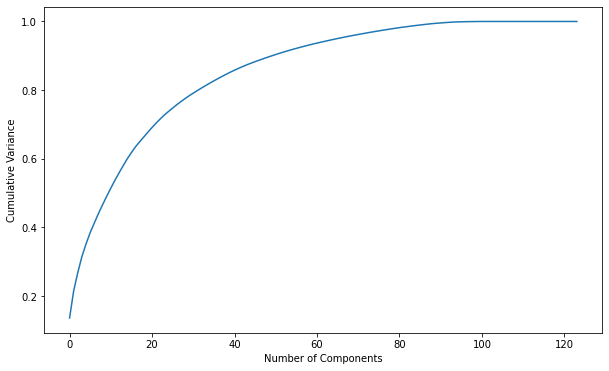

In [68]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

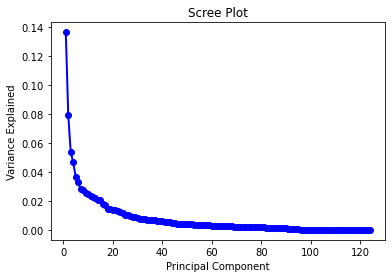

In [69]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can see that 70 components explain amost more than 90% variance of the data. So we will perform PCA with 70 components.



#### Performing PCA with 70 components


In [70]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [71]:
# Instantiate PCA with 70 components
pca_final = IncrementalPCA(n_components=70)

In [72]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [73]:
X_test_pca = pca_final.transform(X_test)

Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

Tuning hyperparameter C

- C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [75]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [76]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [77]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.265188,0.036125,0.007432,0.002313,0.01,{'C': 0.01},0.046185,0.086957,0.038306,0.045726,0.047151,0.052865,0.017335,6,0.055611,0.046859,0.058036,0.063216,0.060909,0.056926,0.005652
1,0.480485,0.071669,0.008104,0.002146,0.1,{'C': 0.1},0.056225,0.088933,0.054435,0.059642,0.060904,0.064028,0.012666,5,0.068520,0.058325,0.070933,0.075660,0.072891,0.069266,0.005951
2,0.449565,0.058978,0.005215,0.000265,1,{'C': 1},0.058233,0.086957,0.054435,0.061630,0.062868,0.064825,0.011448,3,0.071996,0.058824,0.072421,0.079144,0.073390,0.071155,0.006681
3,0.522830,0.065241,0.007551,0.002411,10,{'C': 10},0.058233,0.088933,0.054435,0.061630,0.062868,0.065220,0.012213,1,0.072493,0.058824,0.072917,0.079144,0.073390,0.071353,0.006717
4,0.569079,0.043867,0.007788,0.002446,100,{'C': 100},0.058233,0.088933,0.054435,0.059642,0.062868,0.064822,0.012355,4,0.072493,0.058824,0.072917,0.079144,0.073390,0.071353,0.006717
5,0.549280,0.044424,0.008157,0.002294,1000,{'C': 1000},0.058233,0.088933,0.054435,0.061630,0.062868,0.065220,0.012213,1,0.072493,0.058824,0.072917,0.079144,0.073390,0.071353,0.006717


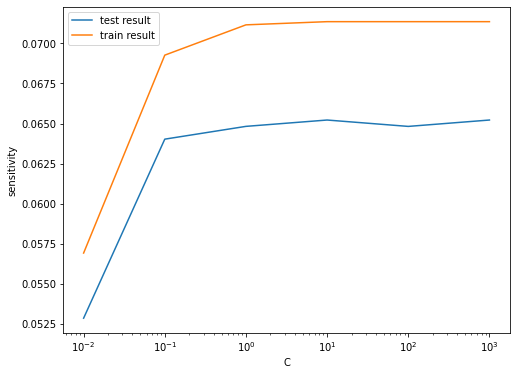

In [78]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [79]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.06521996199230576 at C = 10


Logistic regression with optimal C

In [80]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [81]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Predictions on the train set

In [82]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("----------------------- ")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40659   155]
 [ 2334   178]]
----------------------- 
Accuracy:- 0.9425518164612473
Sensitivity:- 0.07085987261146497
Specificity:- 0.9962022835301613


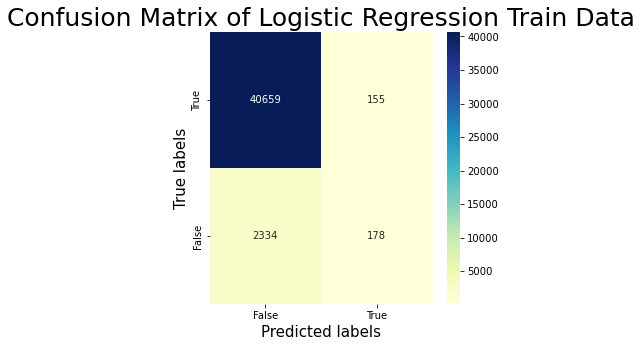

In [83]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Logistic Regression Train Data')

In [84]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40814
           1       0.53      0.07      0.13      2512

    accuracy                           0.94     43326
   macro avg       0.74      0.53      0.55     43326
weighted avg       0.92      0.94      0.92     43326



#### Predictions on the test set

In [85]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("----------------------- ")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17385    82]
 [ 1029    73]]
----------------------- 
Accuracy:- 0.9401690990360277
Sensitivity:- 0.0662431941923775
Specificity:- 0.9953054331024217


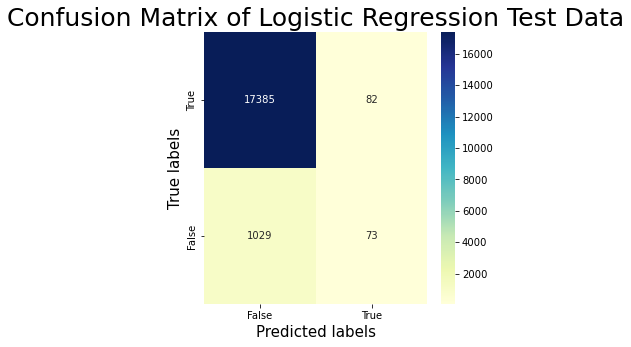

In [86]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Logistic Regression Test Data')

In [87]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17467
           1       0.47      0.07      0.12      1102

    accuracy                           0.94     18569
   macro avg       0.71      0.53      0.54     18569
weighted avg       0.92      0.94      0.92     18569



##### Model summary

###### Train set
- Accuracy:- 0.9425518164612473
- Sensitivity:- 0.07085987261146497
- Specificity:- 0.9962022835301613

######  Test set
- Accuracy:- 0.9401690990360277
- Sensitivity:- 0.0662431941923775
- Specificity:- 0.9953054331024217

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree with PCA


In [88]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [89]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [90]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.087826,0.108299,0.006814,0.002473,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.045726,0.027888,0.055777,0.059761,0.069583,0.051747,0.014171,5
1,2.069539,0.055801,0.006269,0.002249,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.045726,0.027888,0.055777,0.059761,0.069583,0.051747,0.014171,5
2,2.115750,0.119841,0.007966,0.001035,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.045726,0.039841,0.055777,0.047809,0.045726,0.046976,0.005142,7
3,1.979580,0.159756,0.007124,0.001594,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.045726,0.039841,0.055777,0.047809,0.045726,0.046976,0.005142,7
4,3.572735,0.193524,0.008987,0.002802,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.135189,0.155378,0.183267,0.143426,0.157058,0.154864,0.016308,1
5,3.392429,0.150536,0.008036,0.001771,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.135189,0.155378,0.183267,0.143426,0.157058,0.154864,0.016308,1
6,3.454235,0.196778,0.006859,0.001673,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.127237,0.089641,0.083665,0.099602,0.101392,0.100307,0.014950,3
7,3.421504,0.070035,0.006236,0.001194,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.127237,0.087649,0.083665,0.099602,0.101392,0.099909,0.015253,4


In [91]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.15486364680443238
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


Model with optimal hyperparameters

In [92]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

#### Predictions on the train set

In [93]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print("------------------")
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40484   330]
 [ 1960   552]]
------------------
Accuracy:- 0.9471449014448599
Sensitivity:- 0.2197452229299363
Specificity:- 0.9919145391287303


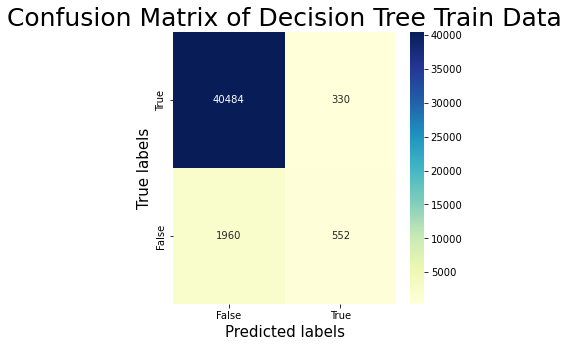

In [94]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Decision Tree Train Data')

#### Predictions on the test set

In [95]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("------------------")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[17250   217]
 [  913   189]]
------------------
Accuracy:- 0.9391458883084711
Sensitivity:- 0.17150635208711434
Specificity:- 0.9875765729661647


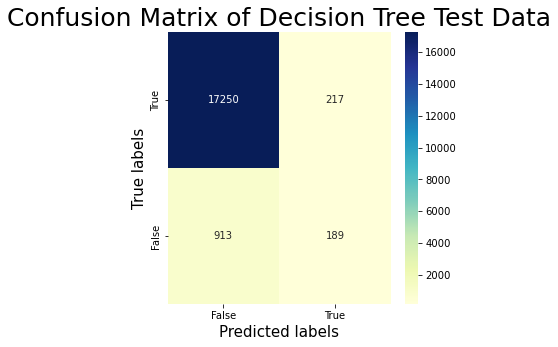

In [96]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Decision Tree Test Data')


##### Model summary

###### Train set
- Accuracy:- 0.9471449014448599
- Sensitivity:- 0.2197452229299363
- Specificity:- 0.9919145391287303

######  Test set
- Accuracy:- 0.9391458883084711
- Sensitivity:- 0.17150635208711434
- Specificity:- 0.9875765729661647

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Random forest with PCA

In [97]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [98]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [99]:
from os.path import exists

In [100]:
if(exists('grid_search_best.pkl')):
    tfidf_params = joblib.load('grid_search_best.pkl')
    tfidf_params
else:
    # Fit the model
    grid_search.fit(X_train_pca, y_train)
    joblib.dump(grid_search.best_params_, 'grid_search_best.pkl', compress = 1) 
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


In [101]:
if(exists('grid_search_best.pkl')):
    tfidf_params = joblib.load('grid_search_best.pkl')

tfidf_params

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [102]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100)

In [103]:

# Fit the model
rfc_model.fit(X_train_pca, y_train)
    

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [104]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40814     0]
 [ 2512     0]]
Accuracy:- 0.9420209573927896
Sensitivity:- 0.0
Specificity:- 1.0


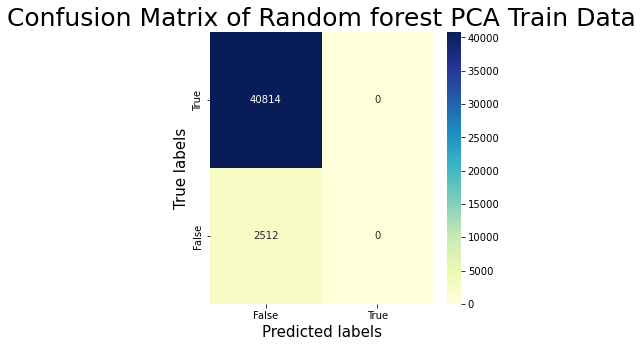

In [105]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Random forest PCA Train Data')


##### Prediction on the test set

In [106]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [107]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17467     0]
 [ 1102     0]]
Accuracy:- 0.9406537778017126
Sensitivity:- 0.0
Specificity:- 1.0


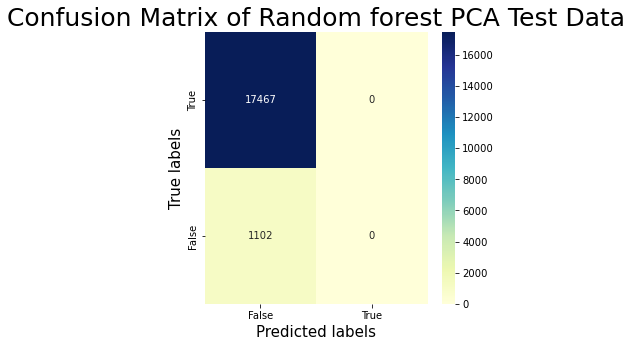

In [108]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Random forest PCA Test Data')


***Model summary***

- Train set
    - Accuracy:- 0.9420209573927896
    - Sensitivity:- 0.0
    - Specificity:- 1.0
- Test set
    - Accuracy:- 0.9406537778017126
    - Sensitivity:- 0.0
    - Specificity:- 1.0
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is at its best in the test set.

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression models preforms good. For both the models the sensitivity was approx 70%. Also we have good accuracy of apporx 94%.

# Without PCA

## Logistic regression without PCA

In [109]:
##### Importing stats model
import statsmodels.api as sm

In [110]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [111]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [112]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43201
Model Family:                Binomial   Df Model:                          124
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6848.7
Date:                Tue, 13 Sep 2022   Deviance:                       13697.
Time:                        19:15:18   Pearson chi2:                 6.12e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2463      0.057    -74.691      0.000      -4.358      -4.135
arpu_6                -0.0016      0.109     -0.015      0.988      -0.214       0.211
arpu_7                 0.1802      0.117      1.545      0.122      -0.048       0.409
arpu_8                 0.6091      0.134      4.550      0.000       0.347       0.871
onnet_mou_6           -0.2448      1.818     -0.135      0.893      -3.808       3.319
onnet_mou_7           -1.0673      1.017     -1.050      0.294      -3.060       0.926
onnet_mou_8           -0.1751      1.642     -0.107      0.915      -3.394       3.044
offnet_mou_6          -0.2007      1.939     -0.103      0.918      -4.001       3.600
offnet_mou_7          -1.2233      1.009     -1.212      0.225      -3.202       0.755
offnet_mou_8          -0.4588      1.659     -0.277      0.782      -3.710       2.792
roam_ic_mou_6          0.0461      0.024      1.959      0.050   -1.24e-05       0.092
roam_ic_mou_7          0.0292      0.028      1.032      0.302      -0.026       0.085
roam_ic_mou_8         -0.0120      0.025     -0.484      0.628      -0.060       0.037
roam_og_mou_6          0.0810      0.446      0.182      0.856      -0.793       0.955
roam_og_mou_7          0.2980      0.188      1.583      0.113      -0.071       0.667
roam_og_mou_8          0.1311      0.341      0.385      0.700      -0.537       0.799
loc_og_t2t_mou_6    1169.7392    672.472      1.739      0.082    -148.282    2487.761
loc_og_t2t_mou_7    1973.9658    701.361      2.814      0.005     599.323    3348.609
loc_og_t2t_mou_8    5974.2750    779.641      7.663      0.000    4446.207    7502.342
loc_og_t2m_mou_6    1278.8734    735.279      1.739      0.082    -162.248    2719.995
loc_og_t2m_mou_7    1992.3413    707.862      2.815      0.005     604.958    3379.725
loc_og_t2m_mou_8    6023.4071    786.072      7.663      0.000    4482.734    7564.080
loc_og_t2f_mou_6     108.8221     62.576      1.739      0.082     -13.825     231.469
loc_og_t2f_mou_7     180.5420     64.147      2.814      0.005      54.816     306.268
loc_og_t2f_mou_8     521.5894     68.062      7.663      0.000     388.190     654.989
loc_og_t2c_mou_6       0.0019      0.025      0.077      0.939      -0.047       0.050
loc_og_t2c_mou_7       0.0253      0.034      0.754      0.451      -0.040       0.091
loc_og_t2c_mou_8       0.0647      0.039      1.651      0.099      -0.012       0.141
loc_og_mou_6       -3891.7177   1426.668     -2.728      0.006   -6687.936   -1095.499
loc_og_mou_7       -3457.5018   1474.329     -2.345      0.019   -6347.134    -567.870
loc_og_mou_8       -4902.2714   1625.125     -3.017      0.003   -8087.458   -1717.085
std_og_t2t_mou_6   -3057.9925   1384.678     -2.208      0.027   -5771.912    -344.073
std_og_t2t_mou_7   -4036.5222   1513.0

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [113]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [114]:
# Importing RFE
from sklearn.feature_selection import RFE

In [115]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg,n_features_to_select= 15)

In [116]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [117]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8'],
      dtype='object')


### Model-1 with RFE selected columns

In [118]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43310
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7625.6
Date:                Tue, 13 Sep 2022   Deviance:                       15251.
Time:                        19:16:34   Pearson chi2:                 1.72e+10
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4042      0.064    -68.329      0.000      -4.531      -4.278
arpu_7                 0.5838      0.033     17.930      0.000       0.520       0.648
offnet_mou_8           1.2929      0.117     11.091      0.000       1.064       1.521
loc_og_t2t_mou_8       1.1359      0.127      8.969      0.000       0.888       1.384
loc_og_mou_8          -1.9082      0.169    -11.275      0.000      -2.240      -1.576
std_og_t2m_mou_8      -0.9992      0.092    -10.868      0.000      -1.179      -0.819
og_others_8           -1.7907      1.361     -1.316      0.188      -4.458       0.877
loc_ic_t2m_mou_8      -1.1372      0.179     -6.343      0.000      -1.489      -0.786
loc_ic_t2f_mou_8      -0.6648      0.128     -5.189      0.000      -0.916      -0.414
loc_ic_mou_8          -0.7372      0.190     -3.880      0.000      -1.110      -0.365
std_ic_t2f_mou_8      -0.7174      0.181     -3.969      0.000      -1.072      -0.363
total_ic_mou_7         0.4282      0.045      9.606      0.000       0.341       0.516
total_ic_mou_8        -0.6381      0.106     -6.006      0.000      -0.846      -0.430
spl_ic_mou_8          -0.9122      0.077    -11.897      0.000      -1.063      -0.762
total_rech_amt_8      -0.8776      0.059    -14.984      0.000      -0.992      -0.763
last_day_rch_amt_8    -0.4355      0.047     -9.310      0.000      -0.527      -0.344
======================================================================================
"""

#### Checking VIFs

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,47.44
4,std_og_t2m_mou_8,31.80
3,loc_og_mou_8,28.98
2,loc_og_t2t_mou_8,13.15
8,loc_ic_mou_8,7.53
11,total_ic_mou_8,7.18
6,loc_ic_t2m_mou_8,3.52
13,total_rech_amt_8,3.47
10,total_ic_mou_7,3.22
0,arpu_7,2.52


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 47.44. Hence, deleting offnet_mou_8 column.

In [121]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8']


### Model-2
Building the model after removing og_others_8 variable.

In [122]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43311
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7628.1
Date:                Tue, 13 Sep 2022   Deviance:                       15256.
Time:                        19:16:36   Pearson chi2:                 1.71e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3797      0.061    -71.569      0.000      -4.500      -4.260
arpu_7                 0.5835      0.033     17.927      0.000       0.520       0.647
offnet_mou_8           1.2920      0.116     11.101      0.000       1.064       1.520
loc_og_t2t_mou_8       1.1351      0.127      8.968      0.000       0.887       1.383
loc_og_mou_8          -1.9080      0.169    -11.282      0.000      -2.239      -1.577
std_og_t2m_mou_8      -0.9983      0.092    -10.884      0.000      -1.178      -0.819
loc_ic_t2m_mou_8      -1.1382      0.179     -6.351      0.000      -1.489      -0.787
loc_ic_t2f_mou_8      -0.6648      0.128     -5.190      0.000      -0.916      -0.414
loc_ic_mou_8          -0.7345      0.190     -3.866      0.000      -1.107      -0.362
std_ic_t2f_mou_8      -0.7273      0.181     -4.026      0.000      -1.081      -0.373
total_ic_mou_7         0.4279      0.045      9.598      0.000       0.340       0.515
total_ic_mou_8        -0.6392      0.106     -6.006      0.000      -0.848      -0.431
spl_ic_mou_8          -0.9118      0.077    -11.898      0.000      -1.062      -0.762
total_rech_amt_8      -0.8783      0.059    -15.009      0.000      -0.993      -0.764
last_day_rch_amt_8    -0.4353      0.047     -9.308      0.000      -0.527      -0.344
======================================================================================
"""

#### Checking VIF for Model-2

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,47.44
4,std_og_t2m_mou_8,31.80
3,loc_og_mou_8,28.98
2,loc_og_t2t_mou_8,13.15
7,loc_ic_mou_8,7.53
10,total_ic_mou_8,7.18
5,loc_ic_t2m_mou_8,3.52
12,total_rech_amt_8,3.47
9,total_ic_mou_7,3.22
0,arpu_7,2.52


In [124]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [125]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43312
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7682.5
Date:                Tue, 13 Sep 2022   Deviance:                       15365.
Time:                        19:16:37   Pearson chi2:                 3.02e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3747      0.061    -71.165      0.000      -4.495      -4.254
arpu_7                 0.5964      0.032     18.448      0.000       0.533       0.660
loc_og_t2t_mou_8       0.5661      0.119      4.747      0.000       0.332       0.800
loc_og_mou_8          -1.0464      0.155     -6.742      0.000      -1.351      -0.742
std_og_t2m_mou_8      -0.0146      0.034     -0.426      0.670      -0.082       0.053
loc_ic_t2m_mou_8      -1.1458      0.183     -6.269      0.000      -1.504      -0.788
loc_ic_t2f_mou_8      -0.6541      0.128     -5.097      0.000      -0.906      -0.403
loc_ic_mou_8          -0.7636      0.195     -3.909      0.000      -1.146      -0.381
std_ic_t2f_mou_8      -0.6889      0.181     -3.806      0.000      -1.044      -0.334
total_ic_mou_7         0.4605      0.045     10.239      0.000       0.372       0.549
total_ic_mou_8        -0.7267      0.110     -6.613      0.000      -0.942      -0.511
spl_ic_mou_8          -0.9121      0.076    -11.977      0.000      -1.061      -0.763
total_rech_amt_8      -0.6213      0.056    -11.088      0.000      -0.731      -0.511
last_day_rch_amt_8    -0.4468      0.046     -9.720      0.000      -0.537      -0.357
======================================================================================
"""

#### VIF Model-3

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_8,7.53
9,total_ic_mou_8,7.17
2,loc_og_mou_8,3.93
4,loc_ic_t2m_mou_8,3.52
11,total_rech_amt_8,3.23
8,total_ic_mou_7,3.22
1,loc_og_t2t_mou_8,2.99
0,arpu_7,2.49
12,last_day_rch_amt_8,1.29
3,std_og_t2m_mou_8,1.27


In [127]:
# Removing std_og_t2m_mou_8 column
log_cols.remove('std_og_t2m_mou_8')

### Model-4
Model after removing std_og_t2m_mou_8 column.

In [128]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                43326
Model:                            GLM   Df Residuals:                    43313
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7682.6
Date:                Tue, 13 Sep 2022   Deviance:                       15365.
Time:                        19:16:38   Pearson chi2:                 3.00e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3752      0.061    -71.171      0.000      -4.496      -4.255
arpu_7                 0.5958      0.032     18.440      0.000       0.532       0.659
loc_og_t2t_mou_8       0.5655      0.119      4.743      0.000       0.332       0.799
loc_og_mou_8          -1.0435      0.155     -6.727      0.000      -1.348      -0.739
loc_ic_t2m_mou_8      -1.1466      0.183     -6.273      0.000      -1.505      -0.788
loc_ic_t2f_mou_8      -0.6531      0.128     -5.092      0.000      -0.905      -0.402
loc_ic_mou_8          -0.7602      0.195     -3.894      0.000      -1.143      -0.378
std_ic_t2f_mou_8      -0.6886      0.181     -3.805      0.000      -1.043      -0.334
total_ic_mou_7         0.4612      0.045     10.261      0.000       0.373       0.549
total_ic_mou_8        -0.7302      0.110     -6.653      0.000      -0.945      -0.515
spl_ic_mou_8          -0.9125      0.076    -11.984      0.000      -1.062      -0.763
total_rech_amt_8      -0.6305      0.052    -12.139      0.000      -0.732      -0.529
last_day_rch_amt_8    -0.4452      0.046     -9.708      0.000      -0.535      -0.355
======================================================================================
"""

In [129]:
#### VIF Model-4
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,7.49
8,total_ic_mou_8,7.13
2,loc_og_mou_8,3.87
3,loc_ic_t2m_mou_8,3.52
7,total_ic_mou_7,3.22
1,loc_og_t2t_mou_8,2.98
10,total_rech_amt_8,2.92
0,arpu_7,2.48
11,last_day_rch_amt_8,1.27
4,loc_ic_t2f_mou_8,1.19


In [130]:
#log_cols.append('std_og_t2m_mou_8')


Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

###  Model performance on the train set

In [131]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

44873    0.000049
34863    0.002158
43158    0.219281
3754     0.085565
42474    0.027808
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.000049,0
1,0,0.002158,1
2,0,0.219281,2
3,0,0.085565,3
4,0,0.027808,4


##### Finding Optimal Probablity Cutoff Point

In [133]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000049,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002158,1,1,0,0,0,0,0,0,0,0,0
2,0,0.219281,2,1,1,1,0,0,0,0,0,0,0
3,0,0.085565,3,1,0,0,0,0,0,0,0,0,0
4,0,0.027808,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [134]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.057979     1.000000     0.000000
0.1          0.1  0.819162     0.743232     0.823835
0.2          0.2  0.934889     0.347134     0.971064
0.3          0.3  0.941190     0.115048     0.992037
0.4          0.4  0.941675     0.054936     0.996251
0.5          0.5  0.941859     0.026274     0.998211
0.6          0.6  0.941698     0.013137     0.998848
0.7          0.7  0.941906     0.007962     0.999387
0.8          0.8  0.941998     0.005175     0.999657
0.9          0.9  0.942067     0.002389     0.999902


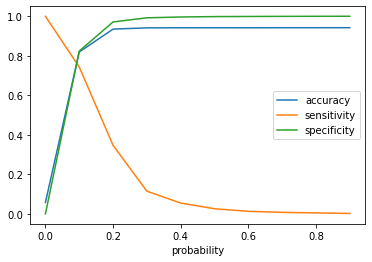

In [135]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy -  Increases with the increasing probablity.

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`Nearby point 0.2` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.1 as the optimum probability cutoff, we are taking ***0.1*** for acheiving higher sensitivity, which is our main goal.

In [136]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.000049,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002158,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.219281,2,1,1,1,0,0,0,0,0,0,0,1
3,0,0.085565,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.027808,4,1,0,0,0,0,0,0,0,0,0,0


In [137]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[33624  7190]
 [  645  1867]]
Accuracy:- 0.8191617042884181
Sensitivity:- 0.7432324840764332
Specificity:- 0.8238349585926398


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [138]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

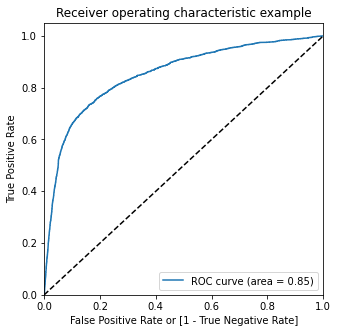

In [139]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 0.8, which is the Gini of the model.

### Testing the model on the test set


In [140]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [141]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log[log_cols] )
X_test_sm.shape

(18569, 13)

In [142]:
X_train_sm_4.shape

(43326, 13)

##### Predictions on the test set with final model

In [143]:
# Predict on the test set
y_test_pred = log_no_pca_4.predict(X_test_sm)

In [144]:
y_test_pred.head()

53465    0.048293
4106     0.002131
47254    0.127140
61951    0.072368
42745    0.009764
dtype: float64

In [145]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
53465,0.048293
4106,0.002131
47254,0.127140
61951,0.072368
42745,0.009764


In [146]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
53465,0
4106,0
47254,0
61951,0
42745,0


In [147]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [148]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [149]:
y_test_pred_final.head()

,churn_probability,CustID,0
0,0,53465,0.048293
1,0,4106,0.002131
2,0,47254,0.127140
3,0,61951,0.072368
4,0,42745,0.009764


In [150]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})



In [151]:
y_test_pred_final.head()

,churn_probability,CustID,churn_prob
0,0,53465,0.048293
1,0,4106,0.002131
2,0,47254,0.127140
3,0,61951,0.072368
4,0,42745,0.009764


In [152]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.1 else 0)

In [153]:
y_test_pred_final.head()

,churn_probability,CustID,churn_prob,test_predicted
0,0,53465,0.048293,0
1,0,4106,0.002131,0
2,0,47254,0.127140,1
3,0,61951,0.072368,0
4,0,42745,0.009764,0


##### Metrics

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[14330  3137]
 [  294   808]]
Accuracy:- 0.8152296838817383
Sensitivity:- 0.7332123411978222
Specificity:- 0.8204041907597184


***Model summary***

- Train set
    - Accuracy:- 0.8191617042884181
    - Sensitivity:- 0.7432324840764332
    - Specificity:- 0.8238349585926398
- Test set
    - Accuracy:- 0.8152296838817383
    - Sensitivity:- 0.7332123411978222
    - Specificity:- 0.8204041907597184
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

In [155]:
# get importance
log_no_pca_4.params


const                -4.375189
arpu_7                0.595820
loc_og_t2t_mou_8      0.565526
loc_og_mou_8         -1.043530
loc_ic_t2m_mou_8     -1.146598
loc_ic_t2f_mou_8     -0.653122
loc_ic_mou_8         -0.760155
std_ic_t2f_mou_8     -0.688586
total_ic_mou_7        0.461241
total_ic_mou_8       -0.730171
spl_ic_mou_8         -0.912536
total_rech_amt_8     -0.630492
last_day_rch_amt_8   -0.445179
dtype: float64

In [156]:
log_no_pca_3.params


const                -4.374700
arpu_7                0.596372
loc_og_t2t_mou_8      0.566119
loc_og_mou_8         -1.046422
std_og_t2m_mou_8     -0.014638
loc_ic_t2m_mou_8     -1.145848
loc_ic_t2f_mou_8     -0.654106
loc_ic_mou_8         -0.763634
std_ic_t2f_mou_8     -0.688942
total_ic_mou_7        0.460504
total_ic_mou_8       -0.726704
spl_ic_mou_8         -0.912124
total_rech_amt_8     -0.621288
last_day_rch_amt_8   -0.446820
dtype: float64

## Decision tree without PCA

In [157]:
# Create the parameter grid 
param_grid_no_pca = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150,50),
    'min_samples_split': range(50, 150,50),
}

# Instantiate the grid search model
dtree_nopca = DecisionTreeClassifier()

grid_search_dt_nopca = GridSearchCV(estimator = dtree_nopca, 
                           param_grid = param_grid_no_pca, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search_dt_nopca.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [158]:
grid_search_dt_nopca.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)

In [159]:
# Model with optimal hyperparameters
dt_no_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_no_pca_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Predictions on the train set

In [160]:
# Predictions on the train set
y_train_pred = dt_no_pca_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print("------------------")
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40349   465]
 [ 1616   896]]
------------------
Accuracy:- 0.9519687947191063
Sensitivity:- 0.35668789808917195
Specificity:- 0.9886068505904837


In [161]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     40814
           1       0.66      0.36      0.46      2512

    accuracy                           0.95     43326
   macro avg       0.81      0.67      0.72     43326
weighted avg       0.94      0.95      0.95     43326



#### Predictions on the test set

In [162]:
# Prediction on the test set
y_test_pred = dt_no_pca_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("------------------")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[17251   216]
 [  732   370]]
------------------
Accuracy:- 0.9489471700145403
Sensitivity:- 0.33575317604355714
Specificity:- 0.9876338237819889


In [163]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17467
           1       0.63      0.34      0.44      1102

    accuracy                           0.95     18569
   macro avg       0.80      0.66      0.71     18569
weighted avg       0.94      0.95      0.94     18569



In [164]:
pd.DataFrame({
    'Feature':dt_no_pca_model.feature_names_in_,
    'Importance':dt_no_pca_model.feature_importances_}).sort_values(by='Importance',ascending=False)


,Feature,Importance
80,total_ic_mou_8,0.668441
14,roam_og_mou_8,0.073741
101,last_day_rch_amt_8,0.042244
104,vol_2g_mb_8,0.038233
65,loc_ic_mou_8,0.038148
40,std_og_mou_7,0.030603
95,total_rech_amt_8,0.029185
53,total_og_mou_8,0.020146
78,total_ic_mou_6,0.013483
79,total_ic_mou_7,0.011896


## Random forest without PCA

In [165]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf_no_pca_model = RandomForestClassifier()

# Instantiate the grid search model
grid_no_pca_search = GridSearchCV(estimator = rf_no_pca_model, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [166]:
if(exists('grid_no_pca_search_best.pkl')):
    grid_no_pca_search_best = joblib.load('grid_no_pca_search_best.pkl')
    print(grid_no_pca_search_best)
else:
    # Fit the model
    grid_no_pca_search.fit(X_train, y_train)
    joblib.dump(grid_no_pca_search.best_params_, 'grid_no_pca_search_best.pkl', compress = 1) 
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_no_pca_search.best_score_,'using',grid_no_pca_search.best_params_)


{'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [167]:
# model with the best hyperparameters

rf_no_pca = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             max_features=20,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [168]:
#rf_no_pca = RandomForestClassifier()
rf_no_pca.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

##### Prediction on the train set

In [169]:
# Predictions on the train set
y_train_pred = rf_no_pca.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40394   420]
 [ 1645   867]]
Accuracy:- 0.9523380879841203
Sensitivity:- 0.34514331210191085
Specificity:- 0.9897094134365659


In [170]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     40814
           1       0.67      0.35      0.46      2512

    accuracy                           0.95     43326
   macro avg       0.82      0.67      0.72     43326
weighted avg       0.94      0.95      0.95     43326



##### Prediction on the test set

In [171]:
# Prediction on the test set
y_test_pred = rf_no_pca.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17293   174]
 [  736   366]]
Accuracy:- 0.9509935914696537
Sensitivity:- 0.33212341197822143
Specificity:- 0.9900383580466021


In [172]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17467
           1       0.68      0.33      0.45      1102

    accuracy                           0.95     18569
   macro avg       0.82      0.66      0.71     18569
weighted avg       0.94      0.95      0.94     18569



In [173]:
pd.DataFrame({
    'Feature':rf_no_pca.feature_names_in_,
    'Importance':rf_no_pca.feature_importances_}).sort_values(by='Importance',ascending=False)

,Feature,Importance
80,total_ic_mou_8,1.772186e-01
65,loc_ic_mou_8,1.678223e-01
59,loc_ic_t2m_mou_8,1.014890e-01
53,total_og_mou_8,8.312742e-02
14,roam_og_mou_8,6.175434e-02
11,roam_ic_mou_8,5.835421e-02
29,loc_og_mou_8,4.822240e-02
20,loc_og_t2m_mou_8,3.160315e-02
56,loc_ic_t2t_mou_8,2.584393e-02
101,last_day_rch_amt_8,2.209670e-02


## Random forest without PCA And Hyper Tuning

In [174]:
rf_no_pca_class = RandomForestClassifier()
rf_no_pca_class.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
# Predictions on the train set
y_train_pred = rf_no_pca_class.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40814     0]
 [    1  2511]]
Accuracy:- 0.9999769191709367
Sensitivity:- 0.9996019108280255
Specificity:- 1.0


In [176]:
# Prediction on the test set
y_test_pred = rf_no_pca_class.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17293   174]
 [  769   333]]
Accuracy:- 0.9492164359954763
Sensitivity:- 0.3021778584392015
Specificity:- 0.9900383580466021


In [177]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17467
           1       0.66      0.30      0.41      1102

    accuracy                           0.95     18569
   macro avg       0.81      0.65      0.69     18569
weighted avg       0.94      0.95      0.94     18569



In [178]:
pd.DataFrame({
    'Feature':rf_no_pca_class.feature_names_in_,
    'Importance':rf_no_pca_class.feature_importances_}).sort_values(by='Importance',ascending=False)

,Feature,Importance
65,loc_ic_mou_8,0.042749
80,total_ic_mou_8,0.038525
59,loc_ic_t2m_mou_8,0.037272
11,roam_ic_mou_8,0.026575
29,loc_og_mou_8,0.026018
53,total_og_mou_8,0.026017
14,roam_og_mou_8,0.023831
20,loc_og_t2m_mou_8,0.021922
2,arpu_8,0.018179
56,loc_ic_t2t_mou_8,0.017278


#### Final conclusion with no PCA

- We can see that the random forest, decision tree model with no PCA has good sensitivity and accuracy in comparsion to the models with PCA. 
- We will go for the model such as random forest with PCA as it expliains the important predictor variables as well as the significance of each variable. 
- The model also helps us to identify the variables which should be act upon for making the decision of the to be churned customers. 

#### Top predictors

Below are few top variables selected in the Random Forest regression model.

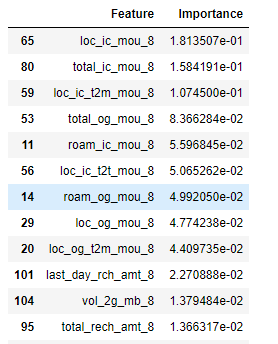



The variables are correlated with the churn probablity.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.

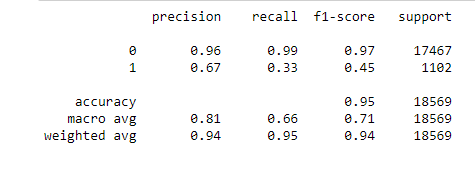

In [179]:
# Checking for list of churn which are not equal to final model predicted churn 
checkmodel = pd.DataFrame(y_train_pred_final.loc[(y_train_pred_final['churn'] != y_train_pred_final['predicted'])] )

In [180]:
# Compare length of model
print('checkmodel: '+ str(len(checkmodel)))
print('y_train_pred_final: '+ str(len(y_train_pred_final)))


checkmodel: 7835
y_train_pred_final: 43326


# Find churn probability for test data .csv

In [181]:
churn_original_test_data.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [182]:
# get columns used for training in train data from test data
churn_test_data = churn_original_test_data[cols_scale]


In [183]:
# chechk % of null value in data
percent_null = churn_test_data.isnull().sum().sum() / np.product(churn_test_data.shape) * 100
percent_null

2.9148387096774195

In [184]:
# now check null percentage for each column
test_null_collist=[]
for col in churn_test_data.columns:
    null_col = churn_test_data[col].isnull().sum() / churn_test_data.shape[0] * 100
    if null_col > 0:
        test_null_collist.append(col)
    print("{} : {:.2f}".format(col,null_col))

arpu_6 : 0.00
arpu_7 : 0.00
arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
roam_ic_mou_6 : 3.90
roam_ic_mou_7 : 3.91
roam_ic_mou_8 : 5.58
roam_og_mou_6 : 3.90
roam_og_mou_7 : 3.91
roam_og_mou_8 : 5.58
loc_og_t2t_mou_6 : 3.90
loc_og_t2t_mou_7 : 3.91
loc_og_t2t_mou_8 : 5.58
loc_og_t2m_mou_6 : 3.90
loc_og_t2m_mou_7 : 3.91
loc_og_t2m_mou_8 : 5.58
loc_og_t2f_mou_6 : 3.90
loc_og_t2f_mou_7 : 3.91
loc_og_t2f_mou_8 : 5.58
loc_og_t2c_mou_6 : 3.90
loc_og_t2c_mou_7 : 3.91
loc_og_t2c_mou_8 : 5.58
loc_og_mou_6 : 3.90
loc_og_mou_7 : 3.91
loc_og_mou_8 : 5.58
std_og_t2t_mou_6 : 3.90
std_og_t2t_mou_7 : 3.91
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_6 : 3.90
std_og_t2m_mou_7 : 3.91
std_og_t2m_mou_8 : 5.58
std_og_t2f_mou_6 : 3.90
std_og_t2f_mou_7 : 3.91
std_og_t2f_mou_8 : 5.58
std_og_mou_6 : 3.90
std_og_mou_7 : 3.91
std_og_mou_8 : 5.58
isd_og_mou_6 : 3.90
isd_og_mou_7 : 3.91
isd_og_mou_8 : 5.58
spl_og_mou_6 : 3.90
spl_og_mou_

In [185]:
# handle na values
for col in test_null_collist:
    churn_test_data[col] = churn_test_data[col].fillna(churn_test_data[col].mode()[0])

In [186]:
churn_test_data.isnull().sum().sum()

0

In [187]:
# now transform test data.. scaling need not to be implement
test_x_test = pd.DataFrame(scaler.transform(churn_test_data),columns = churn_test_data.columns)
#test_x_test =  sm.add_constant(churn_test_data[log_cols] )
#test_x_test = pca_final.transform(churn_test_data)

In [188]:
# Best model to predict test data
probabilities = rf_no_pca.predict(test_x_test)


In [189]:
print(probabilities.shape)
print(len(churn_original_test_data['id']))

(30000,)
30000


In [190]:
submission = pd.DataFrame({'id':churn_original_test_data['id'],'churn_probability':probabilities})

In [191]:
#Save tpo csv file
submission.to_csv('Submission_data_11_1.csv',index=False)

##### Read Submission CSV file to find churn prob count

In [192]:
submission_data = pd.read_csv("Submission_data_11_1.csv")

In [193]:
submission_data_churn = submission_data[submission_data['churn_probability'] == 1]
submission_data_not_churn = submission_data[submission_data['churn_probability'] == 0]

In [194]:
# Distribution plot
print(len(submission_data_churn), len(submission_data_not_churn))

2184 27816
